In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Root dataset folder
dataset_root = "MLPR_Dataset_Copy"
output_root = "Processed_Images"

# Ensure output root exists
os.makedirs(output_root, exist_ok=True)

# Define green color range (HSV)
lower_green = np.array([30, 100, 100])
upper_green = np.array([90, 255, 255])

# Recursive function to process images in all subfolders
def process_images_in_folder(folder_path, output_folder):
    # Ensure output folder exists
    os.makedirs(output_folder, exist_ok=True)

    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        output_item_path = os.path.join(output_folder, item)

        if os.path.isdir(item_path):
            # Recursively process subfolders
            process_images_in_folder(item_path, output_item_path)
        elif item.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Read image
            image = cv2.imread(item_path)
            if image is None:
                print(f"Error loading image: {item_path}")
                continue

            # Convert to HSV and create mask
            hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            mask = cv2.inRange(hsv, lower_green, upper_green)

            # Morphological operations to refine mask
            kernel = np.ones((7, 7), np.uint8)
            mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)    # Closing to fill small holes 
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)     # Opening to remove noise 

            # Find contours
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            contour_debug = image.copy()
            cv2.drawContours(contour_debug, contours, -1, (255, 0, 0), 2)

            # Detect circular well
            well_contour = None
            max_radius = 0
            for cnt in contours:
                (x, y), radius = cv2.minEnclosingCircle(cnt)
                circularity = (4 * np.pi * cv2.contourArea(cnt)) / (cv2.arcLength(cnt, True) ** 2 + 1e-5)

                if radius > max_radius and radius > 30 and circularity > 0.6:
                    max_radius = radius
                    well_contour = (int(x), int(y), int(radius))

            # Draw detected well
            output = image.copy()
            if well_contour:
                x, y, r = well_contour
                cv2.circle(output, (x, y), r, (0, 0, 255), 5)
                cv2.circle(output, (x, y), 5, (255, 0, 0), -1)
                print(f"[✔] Processed: {item_path} - Well detected at ({x}, {y}) with radius {r}")
            else:
                print(f"[✘] Processed: {item_path} - No well detected.")

            # Save processed image and mask
            cv2.imwrite(os.path.join(output_folder, f"processed_{item}"), output)
            cv2.imwrite(os.path.join(output_folder, f"mask_{item}"), mask)

# Start processing from the root dataset folder
process_images_in_folder(dataset_root, output_root)

print("✅ All images processed and saved in:", output_root)

[✔] Processed: Processed_Dataset/100 hr/pH8 Enzymatic/IMG07811.JPG - Well detected at (849, 518) with radius 459
[✔] Processed: Processed_Dataset/100 hr/pH8 Enzymatic/IMG07810.JPG - Well detected at (1195, 489) with radius 462
[✔] Processed: Processed_Dataset/100 hr/pH8 Enzymatic/IMG07812.JPG - Well detected at (776, 604) with radius 458
[✔] Processed: Processed_Dataset/100 hr/pH8 Enzymatic/IMG07813.JPG - Well detected at (791, 520) with radius 457
[✔] Processed: Processed_Dataset/100 hr/pH8 Enzymatic/IMG07814.JPG - Well detected at (801, 500) with radius 456
[✔] Processed: Processed_Dataset/100 hr/pH8 Enzymatic/IMG07815.JPG - Well detected at (884, 525) with radius 464
[✔] Processed: Processed_Dataset/100 hr/pH5 Enzymatic/IMG07523.JPG - Well detected at (880, 535) with radius 458
[✔] Processed: Processed_Dataset/100 hr/pH5 Enzymatic/IMG07522.JPG - Well detected at (846, 539) with radius 463
[✘] Processed: Processed_Dataset/100 hr/pH5 Enzymatic/IMG07521.JPG - No well detected.
[✔] Proc

In [ ]:
import cv2
import numpy as np
import os

# Root dataset folder
dataset_root = "MLPR_Dataset_Copy"
output_root = "Processed_Images"
cropped_output_root = "Cropped_Images"

# Ensure output folders exist
os.makedirs(output_root, exist_ok=True)
os.makedirs(cropped_output_root, exist_ok=True)

# Define green color range (HSV)
lower_green = np.array([30, 100, 100])
upper_green = np.array([90, 255, 255])

def process_images_in_folder(folder_path, output_folder, cropped_folder):
    os.makedirs(output_folder, exist_ok=True)
    os.makedirs(cropped_folder, exist_ok=True)

    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        output_item_path = os.path.join(output_folder, item)
        cropped_item_path = os.path.join(cropped_folder, item)

        if os.path.isdir(item_path):
            process_images_in_folder(item_path, output_item_path, cropped_item_path)
        elif item.lower().endswith(('.png', '.jpg', '.jpeg')):
            image = cv2.imread(item_path)
            if image is None:
                print(f"❌ Error loading image: {item_path}")
                continue

            hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            mask = cv2.inRange(hsv, lower_green, upper_green)

            kernel = np.ones((7, 7), np.uint8)
            mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            well_contour = None
            max_radius = 0

            for cnt in contours:
                (x, y), radius = cv2.minEnclosingCircle(cnt)
                circularity = (4 * np.pi * cv2.contourArea(cnt)) / (cv2.arcLength(cnt, True) ** 2 + 1e-5)

                if radius > max_radius and radius > 30 and circularity > 0.6:
                    max_radius = radius
                    well_contour = (int(x), int(y), int(radius))

            output = image.copy()
            if well_contour:
                x, y, r = well_contour
                cv2.circle(output, (x, y), r, (0, 0, 255), 5)
                cv2.circle(output, (x, y), 5, (255, 0, 0), -1)

                # Ensure the crop is within image bounds
                h, w = image.shape[:2]
                x1, y1 = max(x - r, 0), max(y - r, 0)
                x2, y2 = min(x + r, w), min(y + r, h)

                cropped_image = image[y1:y2, x1:x2]

                # Check if cropped image is valid
                if cropped_image.size > 0:
                    # Apply circular mask
                    h_c, w_c = cropped_image.shape[:2]
                    circular_mask = np.zeros((h_c, w_c), dtype=np.uint8)
                    cv2.circle(circular_mask, (w_c//2, h_c//2), min(r, w_c//2, h_c//2), 255, -1)

                    cropped_result = cv2.bitwise_and(cropped_image, cropped_image, mask=circular_mask)

                    cropped_filename = os.path.join(cropped_folder, f"cropped_{item}")
                    cv2.imwrite(cropped_filename, cropped_result)
                    print(f"✅ Cropped and saved: {cropped_filename}")
                else:
                    print(f"⚠️ Skipping cropping for {item}: Invalid crop size")

            # Save processed images
            cv2.imwrite(os.path.join(output_folder, f"processed_{item}"), output)
            cv2.imwrite(os.path.join(output_folder, f"mask_{item}"), mask)

# Start processing
process_images_in_folder(dataset_root, output_root, cropped_output_root)

print("✅ All images processed and cropped successfully!")

✅ Cropped and saved: Cropped_Images/100 hr/pH8 Enzymatic/cropped_IMG07811.JPG
✅ Cropped and saved: Cropped_Images/100 hr/pH8 Enzymatic/cropped_IMG07810.JPG
✅ Cropped and saved: Cropped_Images/100 hr/pH8 Enzymatic/cropped_IMG07812.JPG
✅ Cropped and saved: Cropped_Images/100 hr/pH8 Enzymatic/cropped_IMG07813.JPG
✅ Cropped and saved: Cropped_Images/100 hr/pH8 Enzymatic/cropped_IMG07814.JPG
✅ Cropped and saved: Cropped_Images/100 hr/pH8 Enzymatic/cropped_IMG07815.JPG
✅ Cropped and saved: Cropped_Images/100 hr/pH5 Enzymatic/cropped_IMG07523.JPG
✅ Cropped and saved: Cropped_Images/100 hr/pH5 Enzymatic/cropped_IMG07522.JPG
✅ Cropped and saved: Cropped_Images/100 hr/pH5 Enzymatic/cropped_IMG07521.JPG
✅ Cropped and saved: Cropped_Images/100 hr/pH5 Enzymatic/cropped_IMG07525.JPG
✅ Cropped and saved: Cropped_Images/100 hr/pH5 Enzymatic/cropped_IMG07524.JPG
✅ Cropped and saved: Cropped_Images/100 hr/pH5 Enzymatic/cropped_IMG07526.JPG
✅ Cropped and saved: Cropped_Images/100 hr/pH6 Hydrolytic/croppe

In [43]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops

# Root dataset folder
dataset_root = "Cropped_Images"
output_root = "Processed_Dataset"
os.makedirs(output_root, exist_ok=True)

# Feature storage
features = []

def process_images_in_folder(folder_path, output_folder):
    os.makedirs(output_folder, exist_ok=True)  # Ensure output structure

    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        output_item_path = os.path.join(output_folder, item)

        if os.path.isdir(item_path):
            # Recursively process subfolders
            process_images_in_folder(item_path, output_item_path)
        elif item.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Extract image name
            image_name = os.path.basename(item).replace("cropped_", "")

            # Read image
            image = cv2.imread(item_path)
            if image is None:
                print(f"Error loading image: {item_path}")
                continue
            
            # --- Normalization ---
            lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
            l, a, b = cv2.split(lab)
            clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
            l_clahe = clahe.apply(l)
            normalized_image = cv2.cvtColor(cv2.merge((l_clahe, a, b)), cv2.COLOR_LAB2BGR)
            
            # Save normalized image
            cv2.imwrite(output_item_path, normalized_image)
            
            # --- Color Features ---
            hsv_image = cv2.cvtColor(normalized_image, cv2.COLOR_BGR2HSV)
            hue, saturation, value = cv2.split(hsv_image)
            mean_hue = np.mean(hue)
            std_saturation = np.std(saturation)
            avg_intensity = np.mean(value)
            
            # --- Texture Features ---
            gray_image = cv2.cvtColor(normalized_image, cv2.COLOR_BGR2GRAY)
            glcm = graycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
            contrast = graycoprops(glcm, 'contrast')[0, 0]
            correlation = graycoprops(glcm, 'correlation')[0, 0]
            energy = graycoprops(glcm, 'energy')[0, 0]
            homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
            
            # Store extracted features
            features.append([item_path, image_name, mean_hue, std_saturation, avg_intensity, contrast, correlation, energy, homogeneity])

# Process dataset
process_images_in_folder(dataset_root, output_root)

# Save extracted features to CSV
features_df = pd.DataFrame(features, columns=["Image_Path", "image_name", "Mean_Hue", "Std_Saturation", "Avg_Intensity", "Contrast", "Correlation", "Energy", "Homogeneity"])
features_df.to_csv("wound_features.csv", index=False)

print("Processing complete. Features saved to 'wound_features.csv'")

Processing complete. Features saved to 'wound_features.csv'


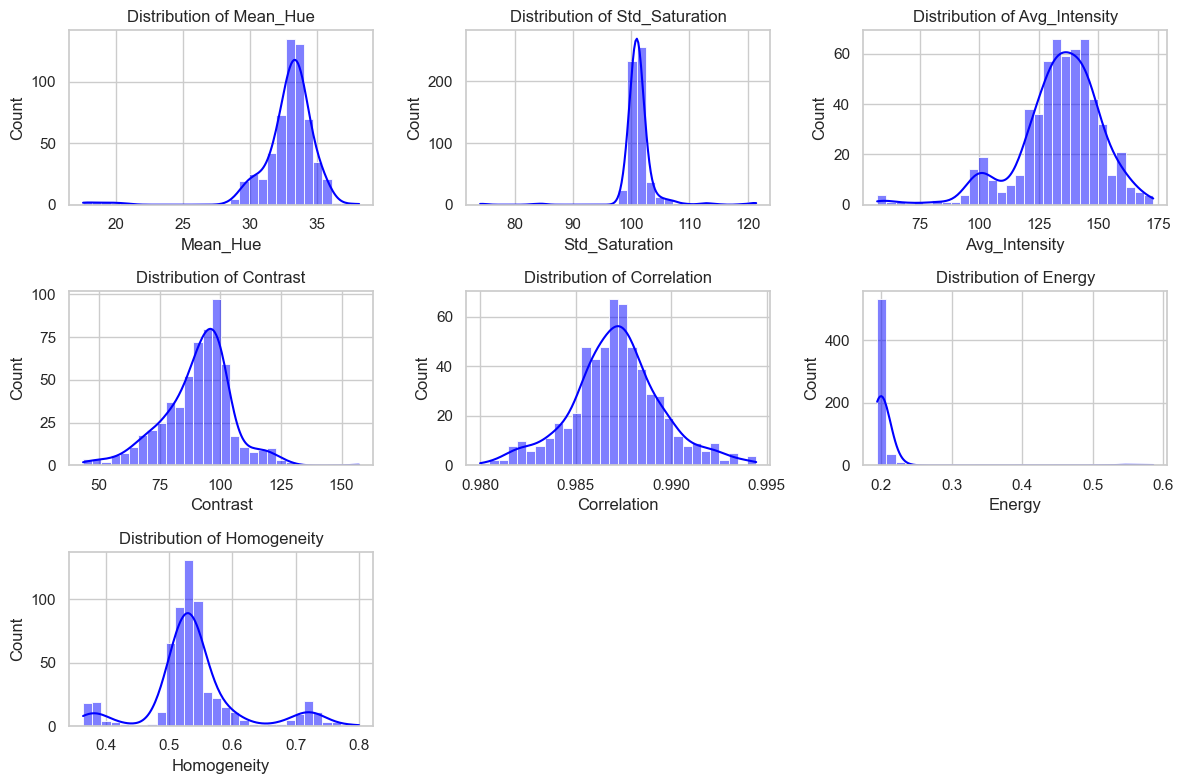

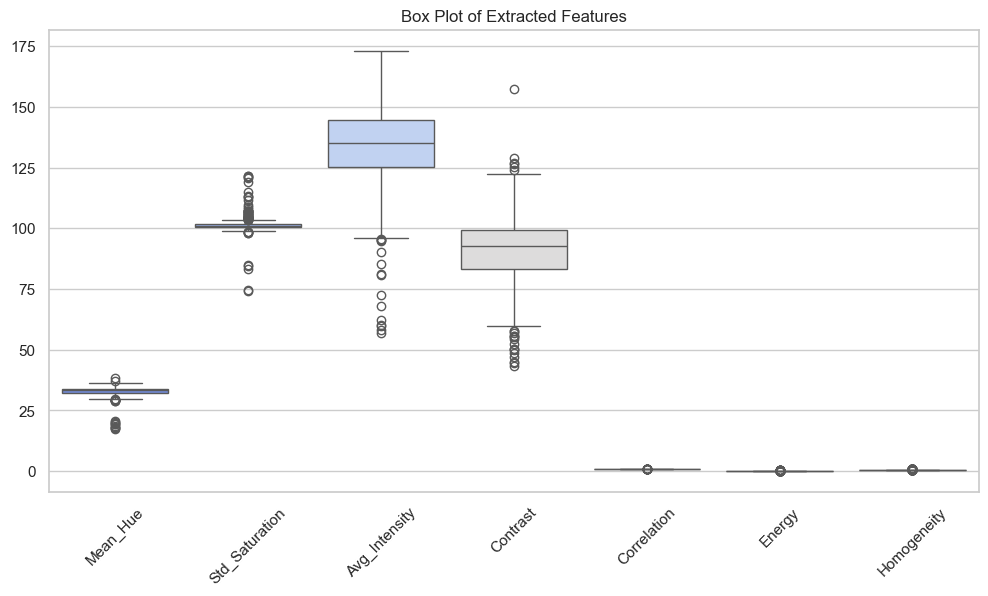

<Figure size 1200x600 with 0 Axes>

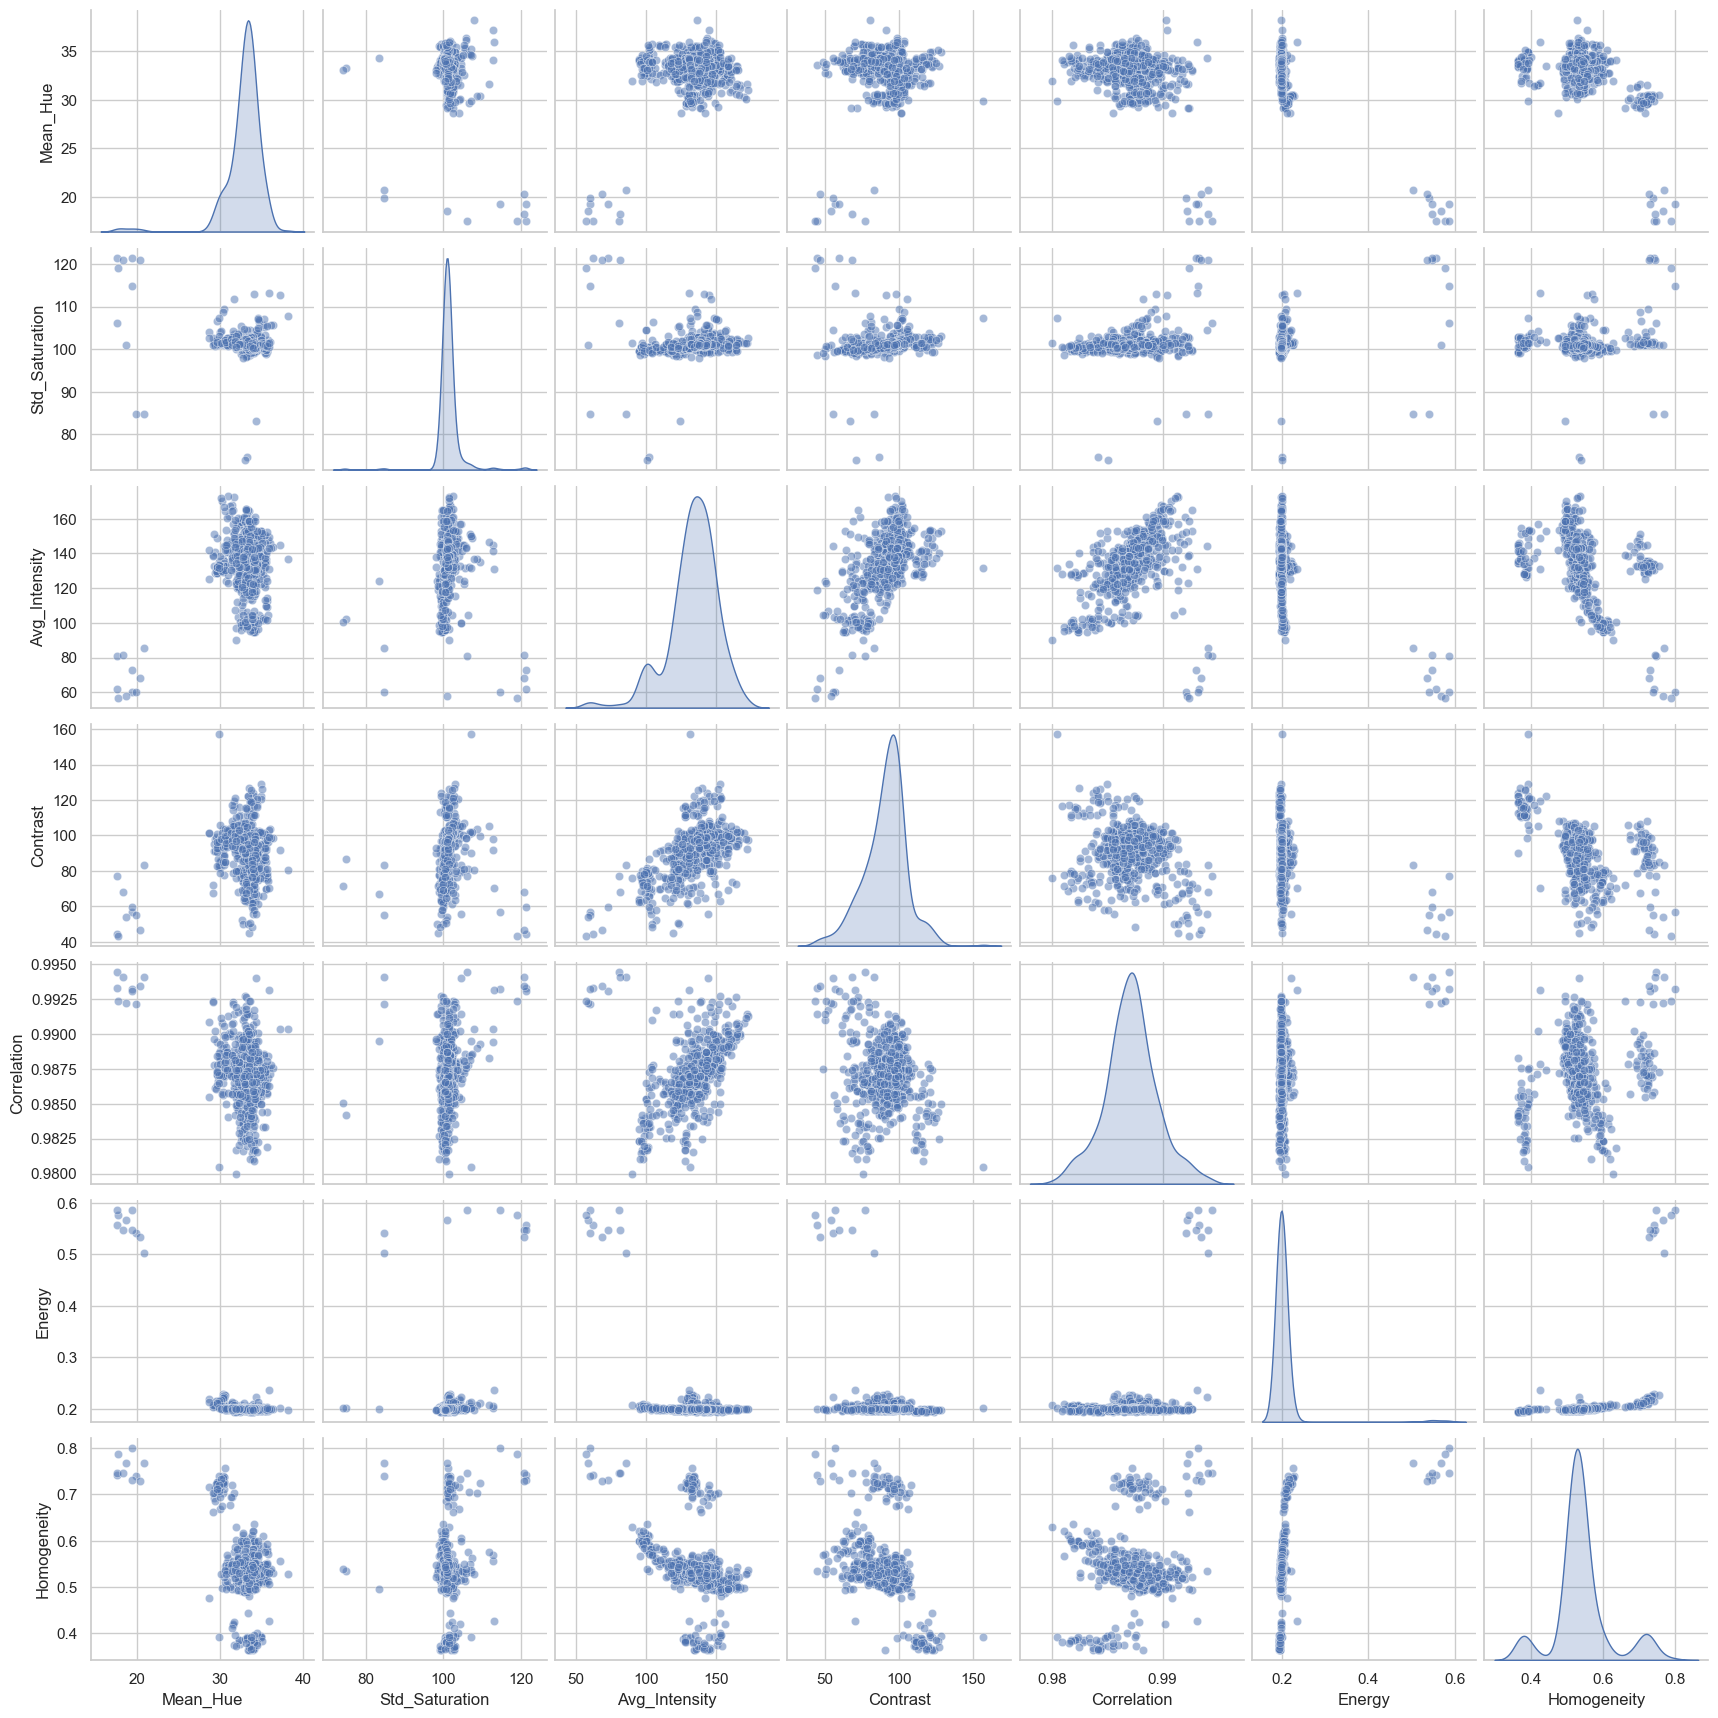

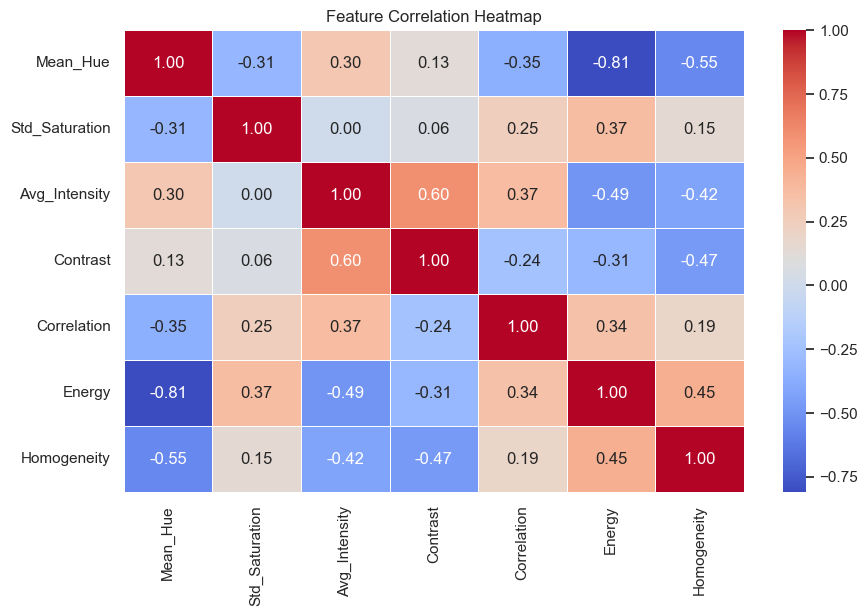

Plots generated successfully! Analyze the distributions, outliers, and correlations.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the extracted features
df = pd.read_csv("wound_features.csv")

# Set the style
sns.set_style("whitegrid")

# 1. Histogram Plots
features = ["Mean_Hue", "Std_Saturation", "Avg_Intensity", "Contrast", "Correlation", "Energy", "Homogeneity"]
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

# 2. Box Plots to Identify Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[features], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Box Plot of Extracted Features")
plt.show()

# 3. Scatter Plots for Correlations
plt.figure(figsize=(12, 6))
sns.pairplot(df[features], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

# 4. Heatmap of Feature Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

print("Plots generated successfully! Analyze the distributions, outliers, and correlations.")

In [44]:
features_df = pd.read_csv("wound_features.csv")
well_data_df = pd.read_csv("well_data.csv")

# Merge the two dataframes on 'image_name'
merged_df = pd.merge(features_df, well_data_df, on="image_name", how="inner")

# Save the merged dataset
merged_df.to_csv("merged_wound_data.csv", index=False)

# Save the merged dataset
merged_df.to_csv("merged_wound_data.csv", index=False)

print("Merged CSV saved as 'merged_wound_data.csv'")

Merged CSV saved as 'merged_wound_data.csv'


                                            Image_Path    image_name  \
180  Cropped_Images/0 hr/pH5 Enzymatic/cropped_IMG0...  IMG00456.JPG   
48   Cropped_Images/5 hr/pH5 Enzymatic/cropped_IMG0...  IMG01249.JPG   
363  Cropped_Images/20 hr/pH5 Enzymatic/cropped_IMG...  IMG01694.JPG   
550  Cropped_Images/25 hr/pH5 Enzymatic/cropped_IMG...  IMG03174.JPG   
315  Cropped_Images/45 hr/pH5 Enzymatic/cropped_IMG...  IMG03944.JPG   
505  Cropped_Images/50 hr/pH5 Enzymatic/cropped_IMG...  IMG04426.JPG   
455  Cropped_Images/75 hr/pH5 Enzymatic/cropped_IMG...  IMG06173.JPG   
275  Cropped_Images/92 hr/pH5 Enzymatic/cropped_IMG...  IMG06653.JPG   
6    Cropped_Images/100 hr/pH5 Enzymatic/cropped_IM...  IMG07521.JPG   
228  Cropped_Images/115 hr/pH5 Enzymatic/cropped_IM...  IMG08003.JPG   

      Mean_Hue  Std_Saturation  Avg_Intensity   Contrast  Correlation  \
180  30.011573      101.360690     132.481214  81.707861     0.988751   
48   33.522291       98.590014     119.166646  44.737111     

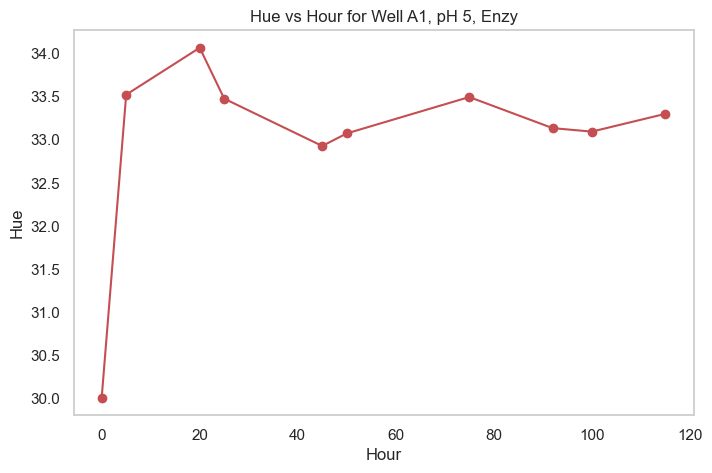

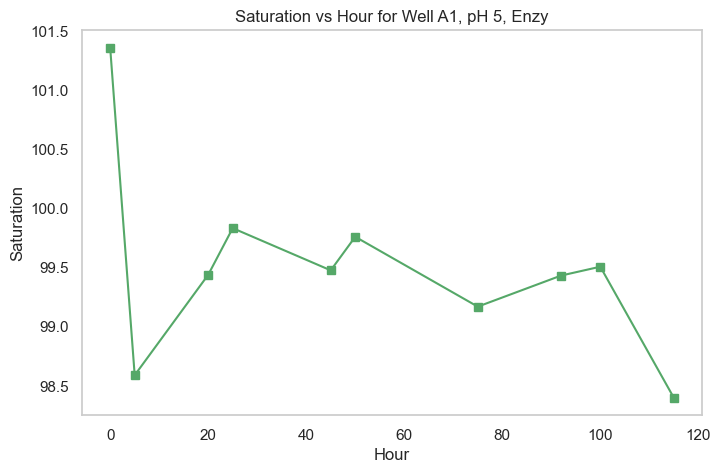

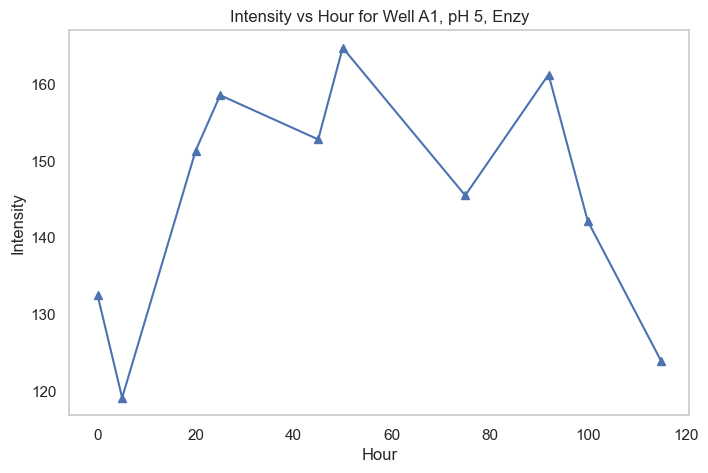

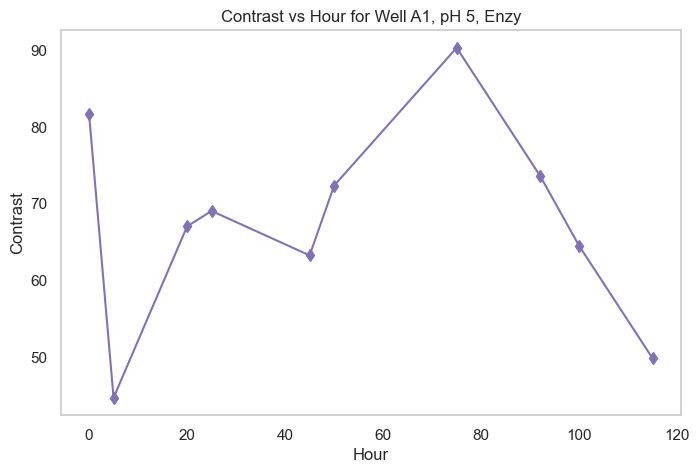

Graphs plotted separately for Well A1, pH 5, Enzy


In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged dataset
merged_df = pd.read_csv("merged_wound_data.csv")

# Choose a specific well number, pH value, and type
well_number = "A1"
pH_value = 5
type_value = "Enzy"

#print(merged_df)

# Filter data for the selected well, pH, and type
filtered_df = merged_df[(merged_df["well_no"] == well_number) & (merged_df["pH_value"] == pH_value) & (merged_df["type"] == type_value)]

# Sort by hour for correct plotting
filtered_df = filtered_df.sort_values(by="hour")

print(filtered_df)

# Plot Hue
plt.figure(figsize=(8, 5))
plt.plot(filtered_df["hour"], filtered_df["Mean_Hue"], marker="o", color="r")
plt.xlabel("Hour")
plt.ylabel("Hue")
plt.title(f"Hue vs Hour for Well {well_number}, pH {pH_value}, {type_value}")
plt.grid()
plt.show()

# Plot Saturation
plt.figure(figsize=(8, 5))
plt.plot(filtered_df["hour"], filtered_df["Std_Saturation"], marker="s", color="g")
plt.xlabel("Hour")
plt.ylabel("Saturation")
plt.title(f"Saturation vs Hour for Well {well_number}, pH {pH_value}, {type_value}")
plt.grid()
plt.show()

# Plot Intensity
plt.figure(figsize=(8, 5))
plt.plot(filtered_df["hour"], filtered_df["Avg_Intensity"], marker="^", color="b")
plt.xlabel("Hour")
plt.ylabel("Intensity")
plt.title(f"Intensity vs Hour for Well {well_number}, pH {pH_value}, {type_value}")
plt.grid()
plt.show()

# Plot Contrast
plt.figure(figsize=(8, 5))
plt.plot(filtered_df["hour"], filtered_df["Contrast"], marker="d", color="m")
plt.xlabel("Hour")
plt.ylabel("Contrast")
plt.title(f"Contrast vs Hour for Well {well_number}, pH {pH_value}, {type_value}")
plt.grid()
plt.show()

print(f"Graphs plotted separately for Well {well_number}, pH {pH_value}, {type_value}")